<a href="https://colab.research.google.com/github/ericking1992/Geol-572-Week6/blob/master/WebServiceReader_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading data from online web services

In [0]:
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# Example dictionary: Big Ten Football Champions
B10Champs = {'2014':['Ohio State','14-1'],'2015':['Michigan State','12-2'],'2016':['Penn State','11-3']}
print(B10Champs)

{'2014': ['Ohio State', '14-1'], '2015': ['Michigan State', '12-2'], '2016': ['Penn State', '11-3']}


In [2]:
print(B10Champs['2014'])

['Ohio State', '14-1']


In [3]:
for key, value in B10Champs.items():
  print('The',key,'Big 10 Football Champion was',value[0],'with a record of',value[1])

The 2014 Big 10 Football Champion was Ohio State with a record of 14-1
The 2015 Big 10 Football Champion was Michigan State with a record of 12-2
The 2016 Big 10 Football Champion was Penn State with a record of 11-3


Obtain USGS real-time data

In [54]:
siteNum = "413743089310102"
USGSparameter = "72019"
period_of_days = "500"
url = "http://waterservices.usgs.gov/nwis/iv/?format=json&sites="+siteNum+"&period=P"+period_of_days+"D&parameterCd="+USGSparameter+"&siteStatus=all"
print(url)

http://waterservices.usgs.gov/nwis/iv/?format=json&sites=413743089310102&period=P500D&parameterCd=72019&siteStatus=all


In [0]:
# open the url
response = urllib.request.urlopen(url)
gw_data = json.loads(response.read())

In [56]:
print(response)

In [57]:
print(gw_data)
type(gw_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



dict

In [58]:
gw_data.keys()

dict_keys(['name', 'declaredType', 'scope', 'value', 'nil', 'globalScope', 'typeSubstituted'])

In [59]:
gw_data['value']['timeSeries'][0].keys()

dict_keys(['sourceInfo', 'variable', 'values', 'name'])

In [0]:
dtw_list = gw_data['value']['timeSeries'][0]['values'][0]['value']

In [61]:
dtw_df = pd.DataFrame.from_dict(dtw_list)
dtw_df.index = pd.to_datetime(dtw_df['dateTime'])
dtw_df['value'] = dtw_df['value'].astype(float)
dtw_df = dtw_df.drop(columns=['qualifiers','dateTime'])
print(dtw_df)
print(dtw_df.value[0])
#print(type(dtw_df['dateTime'][0]))

                           value
dateTime                        
2018-10-19 16:45:00-06:00  23.19
2018-10-19 17:00:00-06:00  23.20
2018-10-19 17:15:00-06:00  23.19
2018-10-19 17:30:00-06:00  23.19
2018-10-19 17:45:00-06:00  23.19
...                          ...
2020-03-02 14:45:00-06:00  22.02
2020-03-02 15:00:00-06:00  22.02
2020-03-02 15:15:00-06:00  22.02
2020-03-02 15:30:00-06:00  22.02
2020-03-02 15:45:00-06:00  22.02

[47632 rows x 1 columns]
23.19


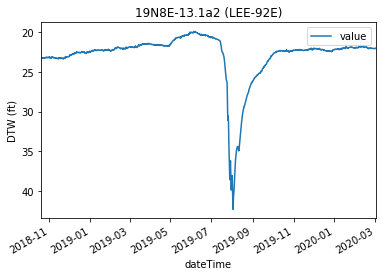

In [63]:
dtw_df.plot()
sitename = gw_data['value']['timeSeries'][0]['sourceInfo']['siteName']
plt.title(sitename)
plt.gca().invert_yaxis()
plt.ylabel('DTW (ft)')
plt.show()